# **Machine Learning Model**

# **Import Dataset**

In [37]:
import pandas as pd

df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


# **Data Preparation**

## **Data separation as X and y**

In [38]:
X = df.drop('Disease', axis=1)
y = df['Disease']

## **One-hot encoding**

In [39]:
X = pd.get_dummies(X, drop_first=True)

## **Data splitting**

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

## **Decision Tree**

### **Training the model**

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### **Making predictions using the model**

In [43]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### **Evaluating the model**

In [44]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [45]:
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:  0.8853046594982079
Testing Accuracy:  0.24285714285714285


### **Precision**

In [46]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
print(f"Precision: {precision}")

Precision: 0.27380952380952384


### **F1-Score**

In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred, average='weighted')

In [49]:
print(f"F1-score: {f1}")

F1-score: 0.2395238095238095


### **AUC-ROC**

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_test_pred)
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted', multi_class='ovr')

In [53]:
print("AUC-ROC:", roc_auc)

AUC-ROC: 0.6172227568449573


### **Recall**

In [50]:
from sklearn.metrics import recall_score

test_recall = recall_score(y_test, y_test_pred, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
print("Recall:", test_recall)

Recall: 0.24285714285714285


## **Feature Visualization**

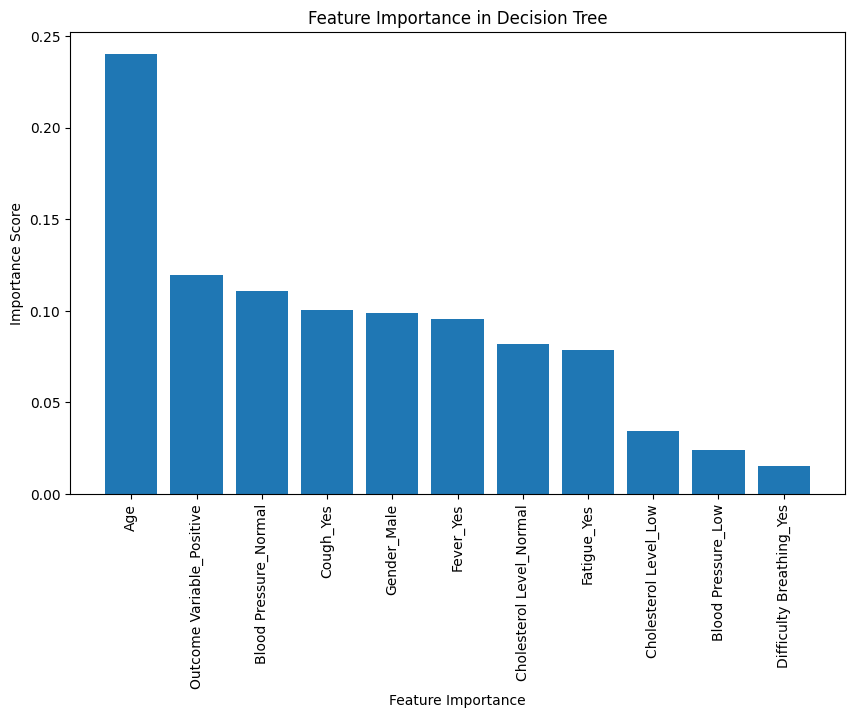

In [42]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Decision Tree")
plt.show()


### **ROC-Curve**

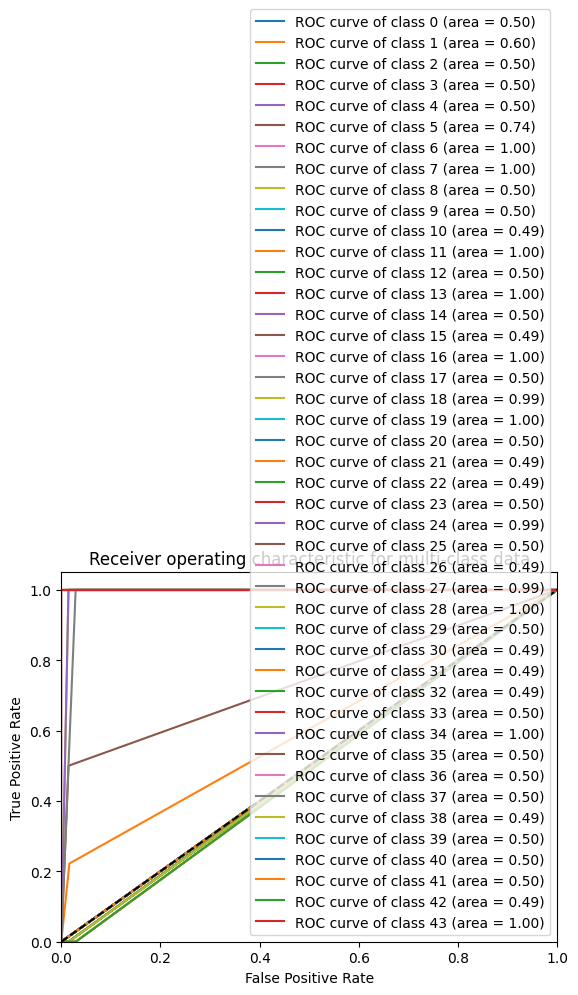

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_pred_bin = label_binarize(y_test_pred, classes=np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## **Example Prediction**

In [ ]:
example_data = pd.DataFrame({
    'Age': [30],
    'Fever': [102.0],
    'Cough': [1],
    'Fatigue': [1],
    'Difficulty Breathing': [0],
    'Loss of Taste or Smell': [0],
    'Muscle or Body Aches': [1],
    'Sore Throat': [0],
    'Runny or Stuffy Nose': [1],
    'Diarrhea': [0],
    'Headache': [1],
    'Gender_Male': [1],
    'Contact with COVID Patient_Yes': [0]
})

In [ ]:
all_features = X_train.columns

example_data = pd.get_dummies(example_data, drop_first=True)
for feature in all_features:
    if feature not in example_data.columns:
        example_data[feature] = 0

example_data = example_data[all_features]

prediction = model.predict(example_data)
print(prediction)

['Conjunctivitis (Pink Eye)']
